In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from wordcloud import WordCloud
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\11 Text Mining\Elon_musk.csv",error_bad_lines=False,encoding='latin1')

C:\Users\Amit D\AppData\Local\Temp\ipykernel_6224\3916774842.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(r"C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\11 Text Mining\Elon_musk.csv",error_bad_lines=False,encoding='latin1')


In [5]:
df

,sr.no.,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
df.drop(["sr.no."],inplace=True,axis=1)

In [7]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
df.shape

(1999, 1)

In [9]:
#remove both the leading and the trailing characters
df=[y.strip() for y in df['Text']]  
df  

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [10]:
len(df)

1999

In [11]:
#removes empty strings,because they are considered in python as False
df=[Text for Text in df if Text]
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [12]:
len(df)

1999

In [13]:
#joining the list into one string/text
text=' '.join(df)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Amit
[nltk_data]     D\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
len(text)

158702

In [16]:
# to remove punctuation marks 
no_punc_text = text.translate(str.maketrans('','',string.punctuation)) 

no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [17]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens= word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 

In [18]:
len(text_tokens)

21078

In [19]:
text_tokens[0:50]

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo']

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Amit
[nltk_data]     D\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
#Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [23]:
len(no_stop_tokens)

15751

In [24]:
#Normalize the data
lower_words=[x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [25]:
#Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [26]:
!python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 5.3 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
#NLP english language model of spacy library
nlp=spacy.load('en_core_web_sm')

In [28]:
#Lemmas being one of them ,but mostly POS ,which will follow later
doc=nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [29]:
lemmas=[token.lemma_ for token in doc]
lemmas

['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'have',
 'try',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'Doge',
 'underestimate',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9wfkmyu2oj',
 'Frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'just',
 'send',
 'just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'httpstco3rWE9uHSTS',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'get',
 'real',
 'buy',
 'Dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'JoshManMode',
 'he',
 'definitely',
 'issue',
 'sentencing',
 '

In [30]:
len(lemmas)

15795

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas)

In [32]:
X

<15795x4972 sparse matrix of type '<class 'numpy.int64'>'
	with 15456 stored elements in Compressed Sparse Row format>

In [33]:
vectorizer.vocabulary_

{'kunalb11': 2703,
 'alien': 231,
 'idaacarmack': 2440,
 'ray': 3622,
 'trace': 4499,
 'cyberpunk': 962,
 'hdr': 1677,
 'nextlevel': 3158,
 'have': 1671,
 'try': 4533,
 'joerogan': 2623,
 'spotify': 4117,
 'great': 1609,
 'interview': 2551,
 'gtera27': 1628,
 'doge': 1115,
 'underestimate': 4666,
 'teslacn': 4344,
 'congratulations': 856,
 'tesla': 4338,
 'china': 740,
 'amazing': 257,
 'execution': 1326,
 'last': 2722,
 'year': 4939,
 'now': 3198,
 'next': 3157,
 'even': 1298,
 'happy': 1658,
 'new': 3154,
 'ox': 3315,
 'httpstco9wfkmyu2oj': 1867,
 'frodo': 1494,
 'underdoge': 4665,
 'all': 234,
 'thought': 4423,
 'would': 4914,
 'fail': 1362,
 'himself': 1723,
 'httpstcozgxjfdzzrm': 2400,
 'owensparks': 3312,
 'flcnhvy': 1436,
 'anonyx10': 286,
 'haha': 1643,
 'thanks': 4382,
 'indeed': 2489,
 'tweets': 4556,
 'definitely': 1017,
 'represent': 3705,
 'realworld': 3647,
 'time': 4442,
 'allocation': 236,
 'the': 4389,
 'entertaining': 1254,
 'outcome': 3292,
 'likely': 2784,
 'givedir

In [34]:
vectorizer.vocabulary_.keys()

dict_keys(['kunalb11', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'agree', 'clubhouse', 'kanyewest', 'httpstco3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'toddler', 'hodler', 'joshmanmode', 'he', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this', 'true', 'power', 

In [35]:
vectorizer.vocabulary_.values()

dict_values([2703, 231, 2440, 3622, 4499, 962, 1677, 3158, 1671, 4533, 2623, 4117, 1609, 2551, 1628, 1115, 4666, 4344, 856, 4338, 740, 257, 1326, 2722, 4939, 3198, 3157, 1298, 1658, 3154, 3315, 1867, 1494, 4665, 234, 4423, 4914, 1362, 1723, 2400, 3312, 1436, 286, 1643, 4382, 2489, 4556, 1017, 3705, 3647, 4442, 236, 4389, 1254, 3292, 2784, 1579, 2650, 3890, 200, 782, 2660, 1805, 1559, 4694, 2573, 1564, 3636, 633, 1117, 2785, 4464, 1733, 2635, 1678, 2571, 3895, 3882, 529, 1713, 1485, 4381, 1428, 3432, 4692, 151, 365, 4628, 4418, 4526, 3474, 1972, 295, 940, 4801, 4898, 1578, 3514, 2677, 423, 898, 4950, 308, 4221, 3794, 4083, 3117, 3883, 1366, 1688, 2731, 1424, 4561, 1213, 2865, 1542, 4465, 3253, 3030, 1803, 214, 4940, 541, 3619, 172, 3252, 3488, 681, 1442, 3651, 4838, 4141, 2561, 4131, 1072, 4314, 263, 1185, 1236, 1759, 1869, 3138, 3351, 1013, 731, 3140, 1845, 2846, 3379, 4474, 667, 3902, 3145, 4732, 3529, 2890, 3105, 3844, 2357, 2954, 3503, 908, 3257, 1069, 4302, 3934, 4461, 2533, 1173, 

In [36]:
vectorizer.vocabulary_.items()

dict_items([('kunalb11', 2703), ('alien', 231), ('idaacarmack', 2440), ('ray', 3622), ('trace', 4499), ('cyberpunk', 962), ('hdr', 1677), ('nextlevel', 3158), ('have', 1671), ('try', 4533), ('joerogan', 2623), ('spotify', 4117), ('great', 1609), ('interview', 2551), ('gtera27', 1628), ('doge', 1115), ('underestimate', 4666), ('teslacn', 4344), ('congratulations', 856), ('tesla', 4338), ('china', 740), ('amazing', 257), ('execution', 1326), ('last', 2722), ('year', 4939), ('now', 3198), ('next', 3157), ('even', 1298), ('happy', 1658), ('new', 3154), ('ox', 3315), ('httpstco9wfkmyu2oj', 1867), ('frodo', 1494), ('underdoge', 4665), ('all', 234), ('thought', 4423), ('would', 4914), ('fail', 1362), ('himself', 1723), ('httpstcozgxjfdzzrm', 2400), ('owensparks', 3312), ('flcnhvy', 1436), ('anonyx10', 286), ('haha', 1643), ('thanks', 4382), ('indeed', 2489), ('tweets', 4556), ('definitely', 1017), ('represent', 3705), ('realworld', 3647), ('time', 4442), ('allocation', 236), ('the', 4389), ('

In [37]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,kunalb11,alien,idaacarmack,ray,trace,cyberpunk,hdr,nextlevel,have,try,...,dire,priority,surreal,propaganda,social,httpstcowjrzibkh1h,click,samwise,gamgee,altho
0,2703,231,2440,3622,4499,962,1677,3158,1671,4533,...,1079,3511,4254,3547,4037,2332,774,3822,1530,247


In [38]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
kunalb11,2703
alien,231
idaacarmack,2440
ray,3622
trace,4499
...,...
httpstcowjrzibkh1h,2332
click,774
samwise,3822
gamgee,1530


In [39]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(by=0,ascending=False)

,0
ðogecoin,4971
zzcool,4970
zwiebelbach,4969
zubinanary,4968
zshauladventure,4967
...,...
10000,4
1000,3
100,2
10,1


In [40]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(20)

,0
005,0
10,1
100,2
1000,3
10000,4
107,5
10x,6
11,7
112,8
11thhour,9


In [41]:
vectorizer.get_feature_names()

C:\Users\Amit D\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['005',
 '10',
 '100',
 '1000',
 '10000',
 '107',
 '10x',
 '11',
 '112',
 '11thhour',
 '12',
 '122',
 '13',
 '130pm',
 '13arm13arm',
 '13ericralph31',
 '14',
 '140pm',
 '149watt',
 '14yearold',
 '15',
 '150',
 '155',
 '16',
 '162',
 '17',
 '18',
 '1880s',
 '1b',
 '1matthewgarcia',
 '1st',
 '1stprinciples4l',
 '20',
 '200',
 '2007',
 '2008',
 '2009',
 '2012',
 '2017',
 '2020',
 '2021',
 '2024',
 '2026',
 '2030',
 '20k',
 '210',
 '218',
 '21st',
 '22',
 '225',
 '23',
 '230',
 '24',
 '240am',
 '247teslanew',
 '25',
 '250',
 '250kw',
 '25d',
 '25gunsteslacom',
 '25k',
 '25th',
 '28',
 '28delayslater',
 '28th',
 '29',
 '2k',
 '2nd',
 '2v',
 '30',
 '300',
 '301',
 '304',
 '304l',
 '31',
 '33',
 '330',
 '360',
 '37',
 '3800',
 '394',
 '39a',
 '3d',
 '3rd',
 '40',
 '400',
 '42',
 '420',
 '4227',
 '430',
 '43rd',
 '445pm',
 '448',
 '4530000',
 '45thspacewe',
 '4680',
 '479000',
 '48',
 '4d',
 '4th',
 '4thfromourstar',
 '50',
 '50000',
 '50k',
 '60',
 '60000',
 '65',
 '69420',
 '6f',
 '6k',
 '72

In [42]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)

In [45]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 10)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df)
tf_idf_matrix_n_gram_max_features

<1999x10 sparse matrix of type '<class 'numpy.float64'>'
	with 3914 stored elements in Compressed Sparse Row format>

In [47]:
print(vectorizer_n_gram_max_features.get_feature_names())

['amp', 'co', 'https', 'https co', 'in', 'is', 'of', 'spacex', 'the', 'to']


In [48]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
pd.DataFrame(tf_idf_matrix_n_gram_max_features.toarray(),
             columns=vectorizer_n_gram_max_features.get_feature_names())

,amp,co,https,https co,in,is,of,spacex,the,to
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.690990,0.722865
...,...,...,...,...,...,...,...,...,...,...
1994,0.434383,0.281219,0.281219,0.281629,0.429888,0.372051,0.0,0.0,0.345911,0.361868
1995,0.768324,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.640061
1996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1997,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000


In [50]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [51]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('ye')
stopwords.add('part')
stopwords.add('laptop')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)


<Figure size 600x400 with 0 Axes>

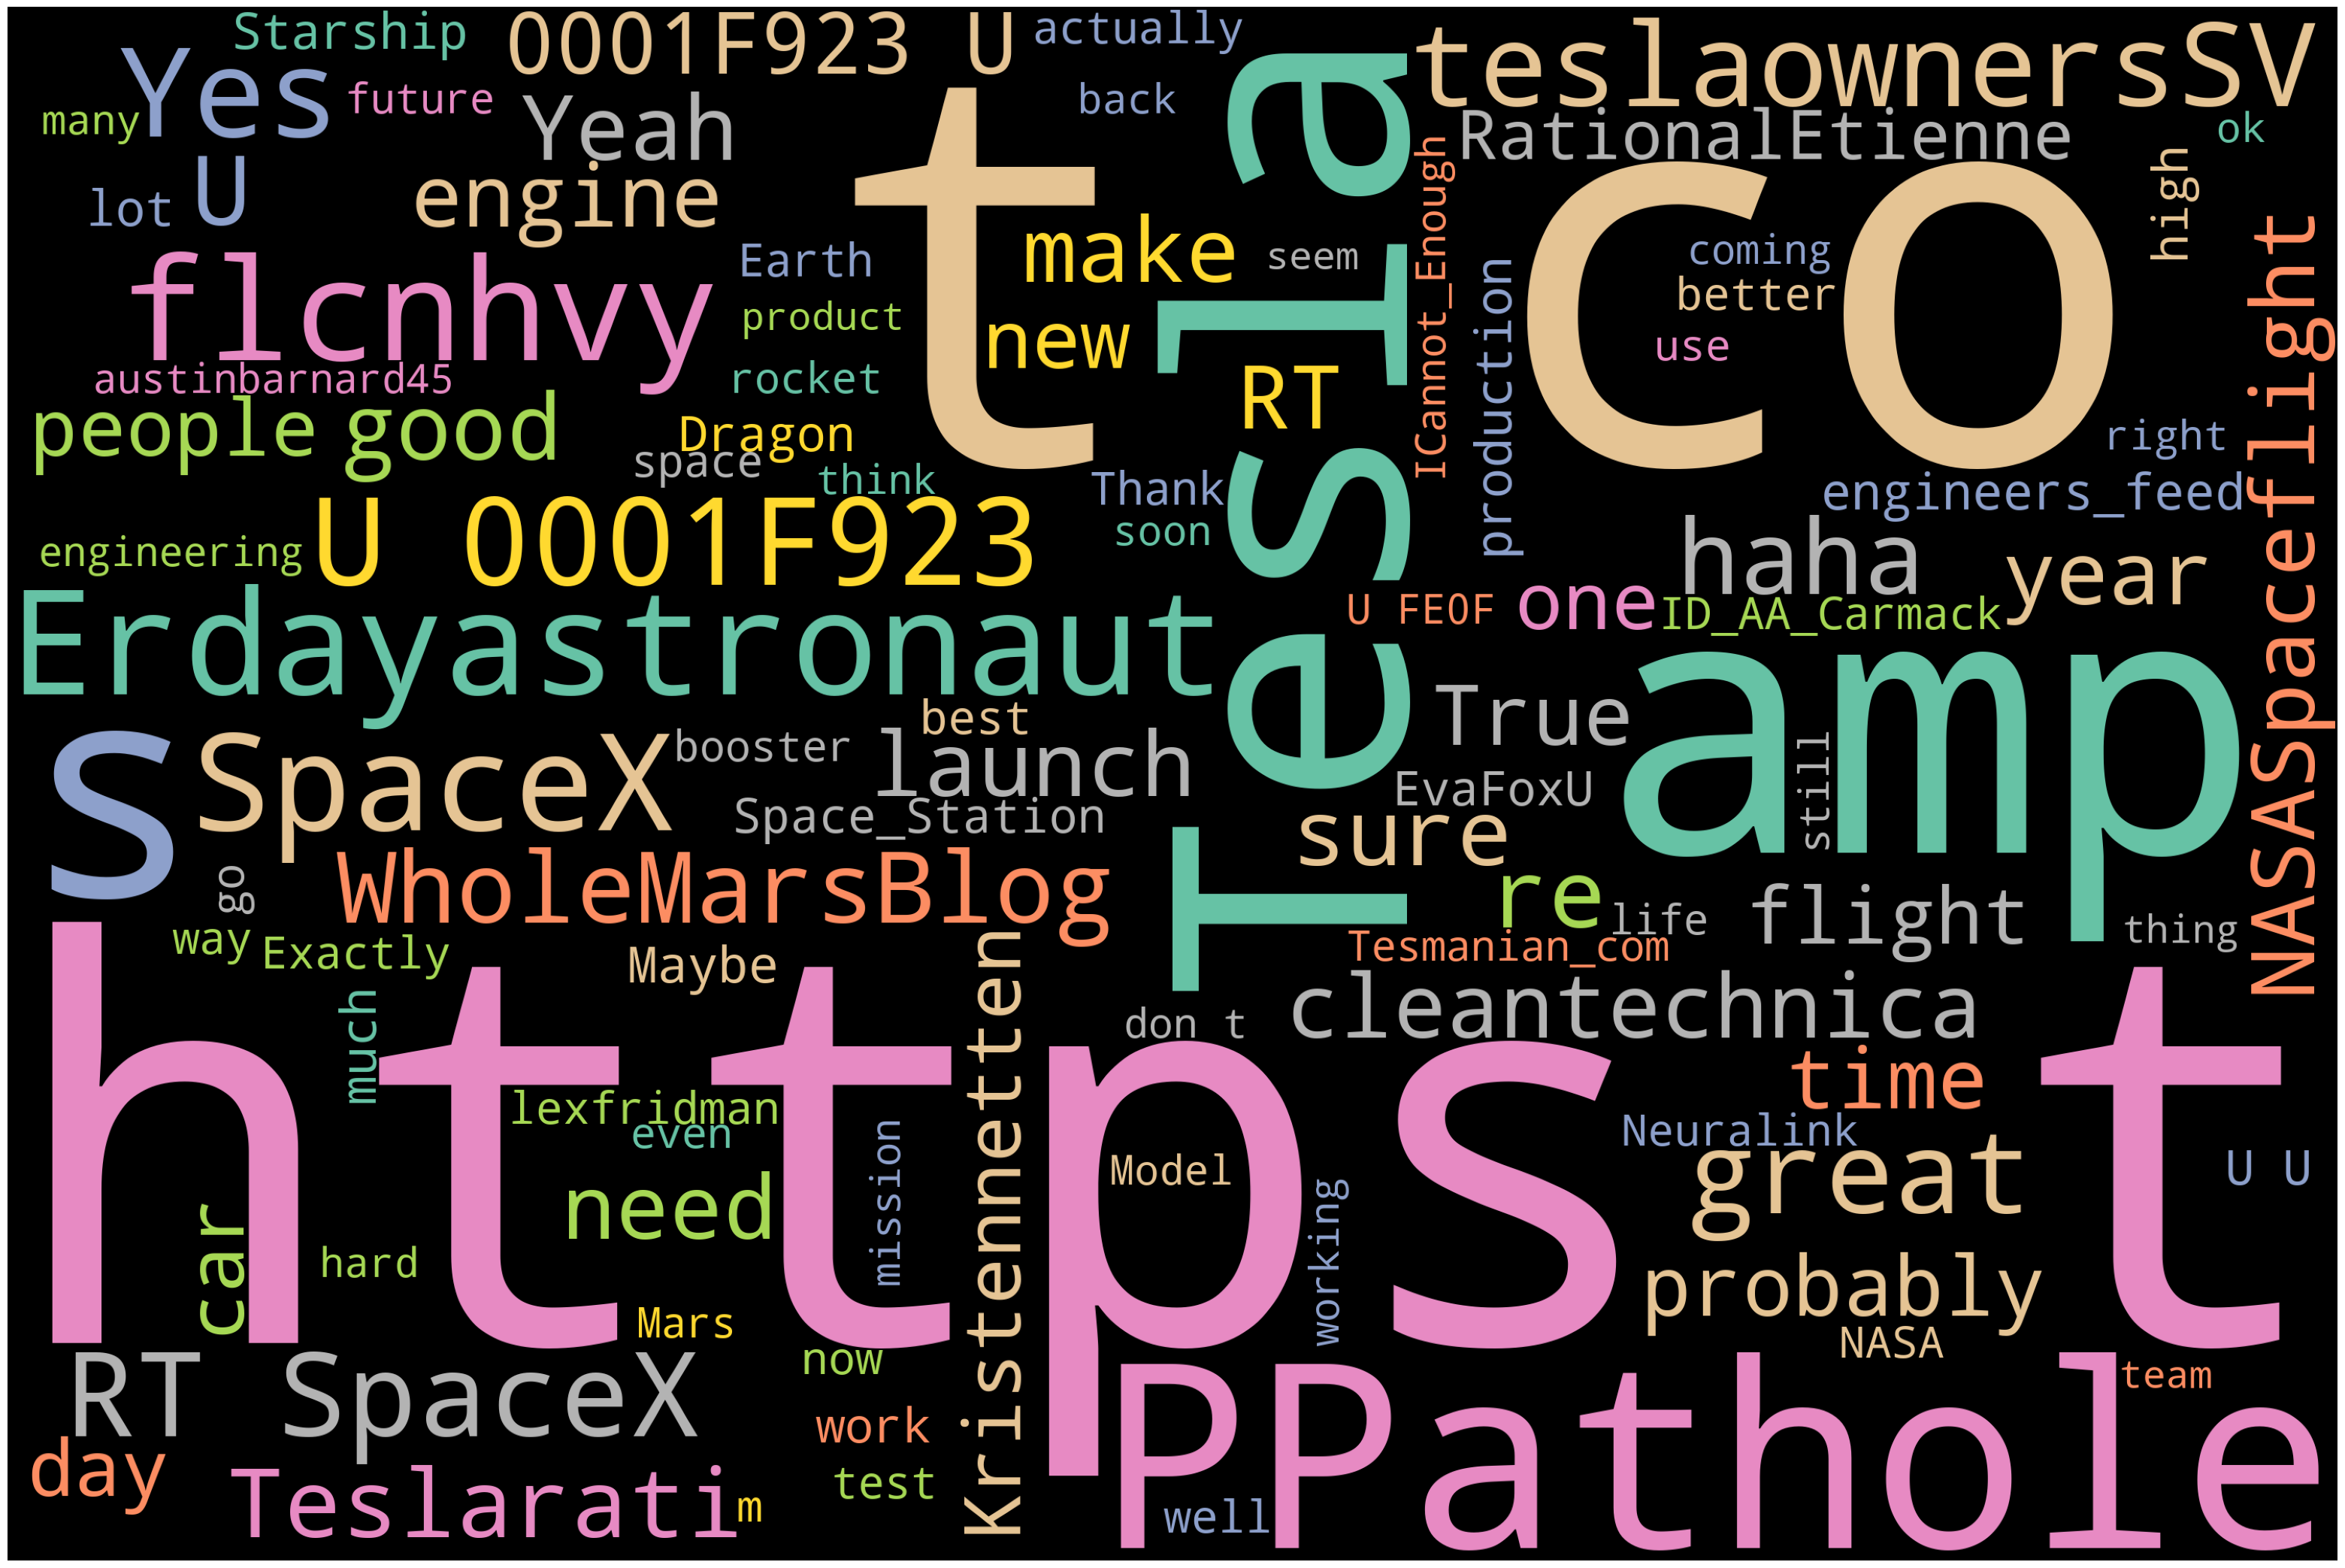

In [52]:
#plot
plt.figure(figsize=(6,4))
plot_cloud(wordcloud)
plt.show()